In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##Crear fechas desde 01-01-2022 hasta 04-05-2023
fechas = pd.date_range(start='01-01-2022',end='04-05-2023')
#fechas = fechas.strftime('%d-%m-%Y')
fechas

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
               '2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03',
               '2023-04-04', '2023-04-05'],
              dtype='datetime64[ns]', length=460, freq='D')

In [3]:
dia_semana = fechas.day_name()
dia_semana

Index(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype='object', length=460)

In [4]:
ventas = pd.DataFrame({'fechas':fechas,'nombre_dia':dia_semana})
ventas

,fechas,nombre_dia
0,2022-01-01,Saturday
1,2022-01-02,Sunday
2,2022-01-03,Monday
3,2022-01-04,Tuesday
4,2022-01-05,Wednesday
...,...,...
455,2023-04-01,Saturday
456,2023-04-02,Sunday
457,2023-04-03,Monday
458,2023-04-04,Tuesday


In [20]:
#reglas
#lunes: 5 cervezas
#martes: 20 cervezas
#miercoles: 40 cervezas
#jueves: 150 cervezas
#viernes: 200 cervezas
#sabado: 200 cervezas
#domingo: 0 cervezas

media_dias = {'Monday': 5, 'Tuesday': 20, 'Wednesday': 40, 'Thursday': 150, 'Friday': 200, 'Saturday': 200, 'Sunday': 0}

def simular_ventas(dia):
    '''esta función simula una venta de cerveza
     entradas: dia (dia de la semana) 
     salida: valor con posible venta para ese día'''
    

    resultado_venta = np.random.normal(media_dias[dia],0.15*media_dias[dia])
    resultado_venta = int(np.round(resultado_venta))
    resultado_venta = max(resultado_venta,0)
    return resultado_venta

simular_ventas('Monday')

5

In [21]:
ventas['ventas'] = ventas['nombre_dia'].apply(simular_ventas)

In [22]:
ventas['Fecha'] = ventas['fechas'].dt.weekday
ventas

,fechas,nombre_dia,ventas,Fecha,compra
0,2022-01-01,Saturday,209,5,0
1,2022-01-02,Sunday,0,6,0
2,2022-01-03,Monday,6,0,613
3,2022-01-04,Tuesday,18,1,0
4,2022-01-05,Wednesday,49,2,0
...,...,...,...,...,...
455,2023-04-01,Saturday,212,5,0
456,2023-04-02,Sunday,0,6,0
457,2023-04-03,Monday,4,0,613
458,2023-04-04,Tuesday,16,1,0


### Grafiquemos los datos de ventas

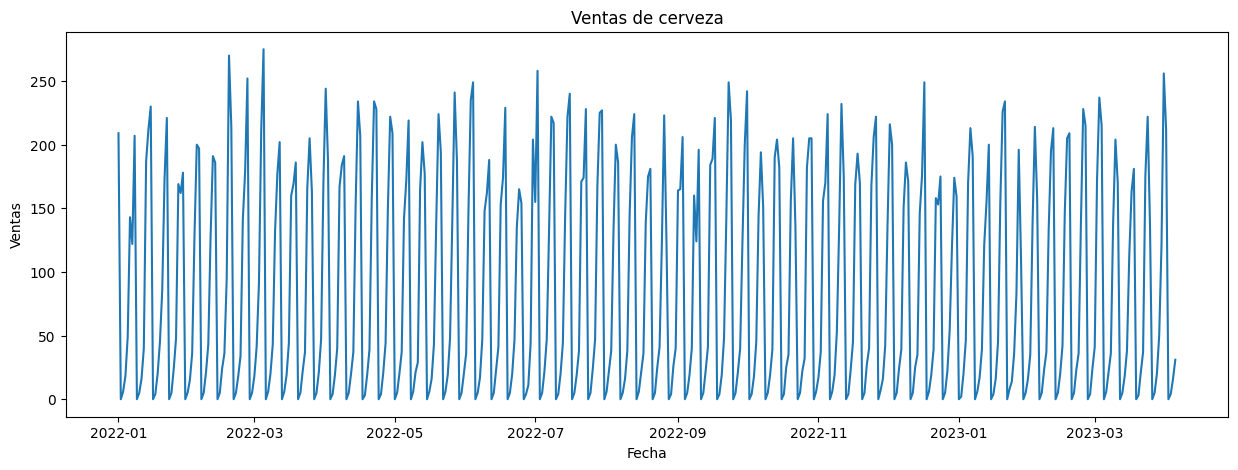

In [23]:
### Visualización de datos

plt.figure(figsize=(15,5))
plt.plot(ventas['fechas'],ventas['ventas'])
plt.title('Ventas de cerveza')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

Para plantear el problema del inventario, tenemos en cuenta lo siguiente:

- El promedio de ventas semanales según la demanda.

In [24]:
### Tomamos los datos de ventas y agrupamos por semana

ventas_semanales = ventas.groupby(pd.Grouper(key='fechas',freq='W')).agg({'ventas':'sum'})
ventas_semanales.drop(ventas_semanales.tail(1).index,inplace=True)
ventas_semanales.drop(ventas_semanales.head(1).index,inplace=True)
ventas_semanales

,ventas
fechas,
2022-01-09,545
2022-01-16,690
2022-01-23,549
2022-01-30,586
2022-02-06,581
...,...
2023-03-05,693
2023-03-12,576
2023-03-19,518


In [25]:
ventas_semanales.describe()

,ventas
count,65.000000
mean,611.200000
std,52.252153
min,446.000000
25%,576.000000
50%,617.000000
75%,645.000000
max,696.000000


/tmp/ipykernel_26332/3733989292.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_inve['Inventario'] = Inventario


<Axes: >

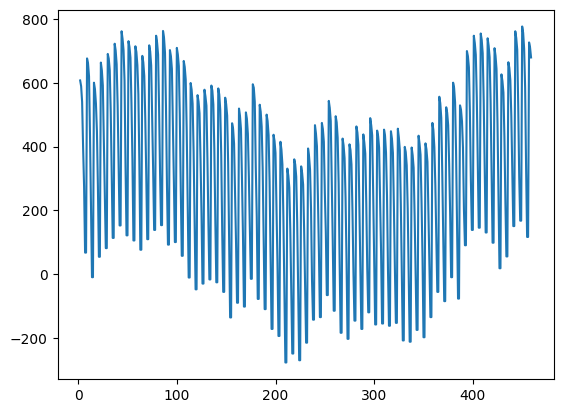

In [26]:
### Programaremos una compra de cervezas para el invetario de la siguiente forma:

### Supondremos que todos los lunes a primera hora compramos 720 cervezas, 
## teniendo en cuenta lo que hay en la base ventas, 
### Vamos a describir como se gasta la cerveza en el inventario.

### Hacemos una variable que indique la compra de cervezas todos los lunes

ventas['compra'] = 0
ventas.loc[ventas['nombre_dia']=='Monday','compra'] = 613
### Quitamos los dos primeros días de ventas

ventas_inve = ventas.iloc[2:,:]


Inventario=[]
for i in ventas_inve.index:
    if i == ventas_inve.index[0]:
        Inventario.append(613-ventas.loc[i,'ventas'])
    else:
        Inventario.append(Inventario[-1]-ventas_inve.loc[i,'ventas']+ventas_inve.loc[i,'compra'])
ventas_inve['Inventario'] = Inventario
ventas_inve['Inventario'].plot()

In [19]:
ventas_inve

,fechas,nombre_dia,ventas,Fecha,compra,Inventario
2,2022-01-03,Monday,8,0,613,605
3,2022-01-04,Tuesday,20,1,0,585
4,2022-01-05,Wednesday,16,2,0,569
5,2022-01-06,Thursday,136,3,0,433
6,2022-01-07,Friday,256,4,0,177
...,...,...,...,...,...,...
455,2023-04-01,Saturday,248,5,0,2
456,2023-04-02,Sunday,0,6,0,2
457,2023-04-03,Monday,5,0,613,610
458,2023-04-04,Tuesday,17,1,0,593
